In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

import pandas as pd

In [3]:
data_path = "data/cars"
data_path = Path(data_path)
images_path = data_path / "training_images"
annotations_file_path = data_path / "annotations.csv"

In [4]:
from example.train_cars import load_cars_df

/opt/conda/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
INFO:pytorch_accelerated:Setting random seeds


In [5]:
train_df, valid_df, lookups = load_cars_df(annotations_file_path, images_path)

In [6]:
train_df.head()

,image,xmin,ymin,xmax,ymax,class_name,has_annotation,image_id,class_id
0,vid_4_1000.jpg,281.259045,187.035071,327.727931,223.225547,car,True,0,0.0
1,vid_4_10000.jpg,15.163531,187.035071,120.329957,236.430180,car,True,1,0.0
2,vid_4_10040.jpg,239.192475,176.764801,361.968162,236.430180,car,True,3,0.0
4,vid_4_10060.jpg,16.630970,186.546010,132.558611,238.386422,car,True,4,0.0
5,vid_4_10100.jpg,447.568741,160.625804,582.083936,232.517696,car,True,6,0.0


In [7]:
train_df = train_df.query('has_annotation == True')

Find normalised height and width of boxes in the training set 

In [8]:
train_df['h'] = train_df['ymax'] -  train_df['ymin']
train_df['w'] = train_df['xmax'] -  train_df['xmin']

In [9]:
train_df

,image,xmin,ymin,xmax,ymax,class_name,has_annotation,image_id,class_id,h,w
0,vid_4_1000.jpg,281.259045,187.035071,327.727931,223.225547,car,True,0,0.0,36.190476,46.468886
1,vid_4_10000.jpg,15.163531,187.035071,120.329957,236.430180,car,True,1,0.0,49.395109,105.166425
2,vid_4_10040.jpg,239.192475,176.764801,361.968162,236.430180,car,True,3,0.0,59.665380,122.775687
4,vid_4_10060.jpg,16.630970,186.546010,132.558611,238.386422,car,True,4,0.0,51.840412,115.927641
5,vid_4_10100.jpg,447.568741,160.625804,582.083936,232.517696,car,True,6,0.0,71.891892,134.515195
...,...,...,...,...,...,...,...,...,...,...,...
554,vid_4_9860.jpg,0.000000,198.321729,49.235251,236.223284,car,True,994,0.0,37.901554,49.235251
555,vid_4_9880.jpg,329.876184,156.482351,536.664239,250.497895,car,True,995,0.0,94.015544,206.788055
556,vid_4_9900.jpg,0.000000,168.295823,141.797524,239.176652,car,True,996,0.0,70.880829,141.797524
557,vid_4_9960.jpg,487.428988,172.233646,616.917699,228.839864,car,True,999,0.0,56.606218,129.488711


In [10]:
from tqdm.contrib.concurrent import process_map

In [11]:
from functools import partial

from PIL import Image

In [12]:

def find_image_size(image_path):
    image = Image.open(image_path)
    w, h = image.size
    return (w, h)

image_sizes = process_map(find_image_size, [images_path/p for p in train_df.image.unique()])


100%|████████████████████████████████████████████████| 256/256 [00:00<00:00, 5775.94it/s]


In [13]:
image_sizes

[(676, 380),
 (676, 380),
 (676, 380),
 (676, 380),
 (676, 380),
 (676, 380),
 (676, 380),
 (676, 380),
 (676, 380),
 (676, 380),
 (676, 380),
 (676, 380),
 (676, 380),
 (676, 380),
 (676, 380),
 (676, 380),
 (676, 380),
 (676, 380),
 (676, 380),
 (676, 380),
 (676, 380),
 (676, 380),
 (676, 380),
 (676, 380),
 (676, 380),
 (676, 380),
 (676, 380),
 (676, 380),
 (676, 380),
 (676, 380),
 (676, 380),
 (676, 380),
 (676, 380),
 (676, 380),
 (676, 380),
 (676, 380),
 (676, 380),
 (676, 380),
 (676, 380),
 (676, 380),
 (676, 380),
 (676, 380),
 (676, 380),
 (676, 380),
 (676, 380),
 (676, 380),
 (676, 380),
 (676, 380),
 (676, 380),
 (676, 380),
 (676, 380),
 (676, 380),
 (676, 380),
 (676, 380),
 (676, 380),
 (676, 380),
 (676, 380),
 (676, 380),
 (676, 380),
 (676, 380),
 (676, 380),
 (676, 380),
 (676, 380),
 (676, 380),
 (676, 380),
 (676, 380),
 (676, 380),
 (676, 380),
 (676, 380),
 (676, 380),
 (676, 380),
 (676, 380),
 (676, 380),
 (676, 380),
 (676, 380),
 (676, 380),
 (676, 380),

In this case, they are all the same size

In [14]:
w, h = image_sizes[0]

In [15]:
train_df['image_h'] = h
train_df['image_w'] = w

In [16]:
train_df['normalized_h'] = train_df['h']/train_df['image_h']
train_df['normalized_w'] = train_df['w']/train_df['image_w']

In [17]:
train_df

,image,xmin,ymin,xmax,ymax,class_name,has_annotation,image_id,class_id,h,w,image_h,image_w,normalized_h,normalized_w
0,vid_4_1000.jpg,281.259045,187.035071,327.727931,223.225547,car,True,0,0.0,36.190476,46.468886,380,676,0.095238,0.068741
1,vid_4_10000.jpg,15.163531,187.035071,120.329957,236.430180,car,True,1,0.0,49.395109,105.166425,380,676,0.129987,0.155572
2,vid_4_10040.jpg,239.192475,176.764801,361.968162,236.430180,car,True,3,0.0,59.665380,122.775687,380,676,0.157014,0.181621
4,vid_4_10060.jpg,16.630970,186.546010,132.558611,238.386422,car,True,4,0.0,51.840412,115.927641,380,676,0.136422,0.171491
5,vid_4_10100.jpg,447.568741,160.625804,582.083936,232.517696,car,True,6,0.0,71.891892,134.515195,380,676,0.189189,0.198987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,vid_4_9860.jpg,0.000000,198.321729,49.235251,236.223284,car,True,994,0.0,37.901554,49.235251,380,676,0.099741,0.072833
555,vid_4_9880.jpg,329.876184,156.482351,536.664239,250.497895,car,True,995,0.0,94.015544,206.788055,380,676,0.247409,0.305899
556,vid_4_9900.jpg,0.000000,168.295823,141.797524,239.176652,car,True,996,0.0,70.880829,141.797524,380,676,0.186528,0.209760
557,vid_4_9960.jpg,487.428988,172.233646,616.917699,228.839864,car,True,999,0.0,56.606218,129.488711,380,676,0.148964,0.191551


## Calculate anchors

In [26]:
from yolov7 import create_yolov7_model

In [27]:
model = create_yolov7_model('yolov7', pretrained=False)

In [30]:
import torch

In [36]:
# torch.tensor([
#     [[12, 16], [19, 36], [40, 28]],
#     [[36, 75], [76, 55], [72, 146]],
#     [[142, 110], [192, 243], [459, 401]],
    

# ]).view(-1,2).shape

torch.Size([9, 2])

In [38]:
current_anchors = model.detection_head.anchor_grid.clone().cpu().view(-1, 2); current_anchors

tensor([[ 12.,  16.],
        [ 19.,  36.],
        [ 40.,  28.],
        [ 36.,  75.],
        [ 76.,  55.],
        [ 72., 146.],
        [142., 110.],
        [192., 243.],
        [459., 401.]])

Here, the numbers [correspond to the width and height](https://github.com/ultralytics/yolov5/issues/6838) of the anchors generated for each pixel. These values are based on the resized (target image) size.

Anchor box is just a scale and aspect ratio of specific object classes in object detection. 

The FPN (Future Pyramid Network) has three outputs and each output's role is to detect objects according to their scale. For example:

- P3/8 is for detecting smaller objects.
- P4/16 is for detecting medium objects.
- P5/32 is for detecting bigger objects.
So when you're going to detect smaller objects you need to use smaller anchor boxes and for medium objects you should use medium scale anchor boxes, so on

In [17]:
import numpy as np

In [18]:
image_sizes = train_df[['image_w', 'image_h']].values

In [19]:
target_image_size = 640

In [20]:
normalized_wh = train_df[['normalized_w', 'normalized_h']].values

Find target image sizes. This is done by resizing so that the longest side is the target size

In [21]:
target_image_sizes = (
    target_image_size * image_sizes / image_sizes.max(1, keepdims=True)
)

In [22]:
target_image_sizes

array([[640.        , 359.76331361],
       [640.        , 359.76331361],
       [640.        , 359.76331361],
       [640.        , 359.76331361],
       [640.        , 359.76331361],
       [640.        , 359.76331361],
       [640.        , 359.76331361],
       [640.        , 359.76331361],
       [640.        , 359.76331361],
       [640.        , 359.76331361],
       [640.        , 359.76331361],
       [640.        , 359.76331361],
       [640.        , 359.76331361],
       [640.        , 359.76331361],
       [640.        , 359.76331361],
       [640.        , 359.76331361],
       [640.        , 359.76331361],
       [640.        , 359.76331361],
       [640.        , 359.76331361],
       [640.        , 359.76331361],
       [640.        , 359.76331361],
       [640.        , 359.76331361],
       [640.        , 359.76331361],
       [640.        , 359.76331361],
       [640.        , 359.76331361],
       [640.        , 359.76331361],
       [640.        , 359.76331361],
 

find wh of boxes for target size

In [23]:
wh = target_image_sizes * normalized_wh

Check whether tiny boxes exist, here this is boxes with either a w or h smaller than 3 pixels

In [24]:
tiny_boxes_exist = (wh < 3).any(1).sum()

If found, filter these

In [25]:
if tiny_boxes_exist:
    print(
        f"WARNING: Extremely small objects found. {tiny_boxes_exist} of {len(wh)} labels are < 3 pixels in size."
    )
    wh = wh[(wh >= 2.0).any(1)]  # filter > 2 pixels

Now we calculate some metric based on the current anchors

### Understanding the metric

In [78]:
def metric(anchors, wh, anchor_thr=4):  # compute metric
    # calculates the ratio of the height and width of each bounding box to each anchor template
    r = wh[:, None] / anchors[None]
    # find min aspect ratio for each bbox
    ratio_metric = torch.min(r, 1.0 / r).min(2)[0]
    best_ratio = ratio_metric.max(1)[0]  # best_x
    aat = (
        (ratio_metric > 1.0 / anchor_thr).float().sum(1).mean()
    )  # anchors above threshold
    bpr = (best_ratio > 1.0 / anchor_thr).float().mean()  # best possible recall
    return bpr, aat, ratio_metric, best_ratio


def anchor_fitness(anchors, wh, anchor_thr=0.25):  # mutation fitness
    _, _, _, best = metric(torch.tensor(anchors, dtype=torch.float32), wh)
    return (best * (best > anchor_thr).float()).mean()  # fitness

calculates the ratio of the height and width of each bounding box to each anchor box (9 here)

Calculate the aspect ratio of GT and Anchor Templates

In [40]:
r = wh[:, None]/ current_anchors[None]; r

tensor([[[ 3.6662,  2.1414],
         [ 2.3155,  0.9518],
         [ 1.0999,  1.2237],
         ...,
         [ 0.3098,  0.3115],
         [ 0.2291,  0.1410],
         [ 0.0958,  0.0854]],

        [[ 8.2972,  2.9228],
         [ 5.2403,  1.2990],
         [ 2.4891,  1.6702],
         ...,
         [ 0.7012,  0.4251],
         [ 0.5186,  0.1924],
         [ 0.2169,  0.1166]],

        [[ 9.6864,  3.5305],
         [ 6.1178,  1.5691],
         [ 2.9059,  2.0174],
         ...,
         [ 0.8186,  0.5135],
         [ 0.6054,  0.2325],
         [ 0.2532,  0.1409]],

        ...,

        [[11.1872,  4.1941],
         [ 7.0656,  1.8641],
         [ 3.3562,  2.3966],
         ...,
         [ 0.9454,  0.6101],
         [ 0.6992,  0.2762],
         [ 0.2925,  0.1673]],

        [[10.2161,  3.3495],
         [ 6.4523,  1.4887],
         [ 3.0648,  1.9140],
         ...,
         [ 0.8633,  0.4872],
         [ 0.6385,  0.2205],
         [ 0.2671,  0.1336]],

        [[10.0219,  3.2912],
       

In [41]:
r.shape

torch.Size([397, 9, 2])

For 397 boxes, we have 9 anchors, then a width and height

In [45]:
current_anchors

tensor([[ 12.,  16.],
        [ 19.,  36.],
        [ 40.,  28.],
        [ 36.,  75.],
        [ 76.,  55.],
        [ 72., 146.],
        [142., 110.],
        [192., 243.],
        [459., 401.]])

In [46]:
wh[0]

array([43.99421122, 34.26317273])

In [44]:
r[0]

tensor([[3.6662, 2.1414],
        [2.3155, 0.9518],
        [1.0999, 1.2237],
        [1.2221, 0.4568],
        [0.5789, 0.6230],
        [0.6110, 0.2347],
        [0.3098, 0.3115],
        [0.2291, 0.1410],
        [0.0958, 0.0854]], dtype=torch.float64)

In [47]:
wh[0]/current_anchors

tensor([[3.6662, 2.1414],
        [2.3155, 0.9518],
        [1.0999, 1.2237],
        [1.2221, 0.4568],
        [0.5789, 0.6230],
        [0.6110, 0.2347],
        [0.3098, 0.3115],
        [0.2291, 0.1410],
        [0.0958, 0.0854]], dtype=torch.float64)

In [48]:
ratio_metric = torch.min(r, 1.0 / r).min(2)[0]; ratio_metric

tensor([[0.2728, 0.4319, 0.8172,  ..., 0.3098, 0.1410, 0.0854],
        [0.1205, 0.1908, 0.4017,  ..., 0.4251, 0.1924, 0.1166],
        [0.1032, 0.1635, 0.3441,  ..., 0.5135, 0.2325, 0.1409],
        ...,
        [0.0894, 0.1415, 0.2980,  ..., 0.6101, 0.2762, 0.1673],
        [0.0979, 0.1550, 0.3263,  ..., 0.4872, 0.2205, 0.1336],
        [0.0998, 0.1580, 0.3326,  ..., 0.4787, 0.2167, 0.1313]],
       dtype=torch.float64)

In [52]:
1/r

tensor([[[ 0.2728,  0.4670],
         [ 0.4319,  1.0507],
         [ 0.9092,  0.8172],
         ...,
         [ 3.2277,  3.2104],
         [ 4.3642,  7.0922],
         [10.4332, 11.7035]],

        [[ 0.1205,  0.3421],
         [ 0.1908,  0.7698],
         [ 0.4017,  0.5987],
         ...,
         [ 1.4262,  2.3522],
         [ 1.9284,  5.1962],
         [ 4.6100,  8.5749]],

        [[ 0.1032,  0.2832],
         [ 0.1635,  0.6373],
         [ 0.3441,  0.4957],
         ...,
         [ 1.2216,  1.9473],
         [ 1.6518,  4.3018],
         [ 3.9488,  7.0989]],

        ...,

        [[ 0.0894,  0.2384],
         [ 0.1415,  0.5365],
         [ 0.2980,  0.4172],
         ...,
         [ 1.0578,  1.6392],
         [ 1.4302,  3.6211],
         [ 3.4191,  5.9756]],

        [[ 0.0979,  0.2986],
         [ 0.1550,  0.6717],
         [ 0.3263,  0.5225],
         ...,
         [ 1.1583,  2.0526],
         [ 1.5662,  4.5343],
         [ 3.7441,  7.4825]],

        [[ 0.0998,  0.3038],
       

Here, we take 1/r as the min. We then keep whichever is the min our of width and height

In [53]:
torch.min(r, 1.0 / r).min(2)[0]

tensor([[0.2728, 0.4319, 0.8172,  ..., 0.3098, 0.1410, 0.0854],
        [0.1205, 0.1908, 0.4017,  ..., 0.4251, 0.1924, 0.1166],
        [0.1032, 0.1635, 0.3441,  ..., 0.5135, 0.2325, 0.1409],
        ...,
        [0.0894, 0.1415, 0.2980,  ..., 0.6101, 0.2762, 0.1673],
        [0.0979, 0.1550, 0.3263,  ..., 0.4872, 0.2205, 0.1336],
        [0.0998, 0.1580, 0.3326,  ..., 0.4787, 0.2167, 0.1313]],
       dtype=torch.float64)

In [54]:
ratio_metric.shape

torch.Size([397, 9])

In [56]:
ratio_metric[0]

tensor([0.2728, 0.4319, 0.8172, 0.4568, 0.5789, 0.2347, 0.3098, 0.1410, 0.0854],
       dtype=torch.float64)

now, we find the best ratio for each box

In [58]:
best_ratio = ratio_metric.max(1)[0]

In [59]:
best_ratio[:5]

tensor([0.8172, 0.7633, 0.6538, 0.6925, 0.6188], dtype=torch.float64)

In [60]:
anchor_thr = 4

anchor_t is the anchor width and height multiple threshold used to select label-anchor matches when computing loss.

Mean anchors above ratio threshold for each box

In [72]:
(ratio_metric > 1. / anchor_thr)

tensor([[ True,  True,  True,  ...,  True, False, False],
        [False, False,  True,  ...,  True, False, False],
        [False, False,  True,  ...,  True, False, False],
        ...,
        [False, False,  True,  ...,  True,  True, False],
        [False, False,  True,  ...,  True, False, False],
        [False, False,  True,  ...,  True, False, False]])

In [73]:
(ratio_metric > 1. / anchor_thr).shape

torch.Size([397, 9])

In [70]:
(ratio_metric > 1. / anchor_thr).float().sum(1).shape

torch.Size([397])

In [74]:
aat = (ratio_metric > 1. / anchor_thr).float().sum(1).mean(); aat # anchors above threshold

tensor(4.8388)

In [75]:
bpr = (best_ratio > 1. / anchor_thr).float().mean(); bpr  # best possible recall

tensor(1.)

best possible recall is achieved if each bounding box is mapped to the optimal anchor

In [79]:
bpr, aat, _, _ = metric(current_anchors, wh); bpr, aat

(tensor(1.), tensor(4.8388))

## Finding new anchors

if BPR is less than a set threshold, we try to find new ones. This is done using kmeans mutation.

From yolov5: When generating new anchors, autoanchor first applies a kmeans function against your dataset labels (scaled to your training --img-size), and uses kmeans centroids as initial conditions for a Genetic Evolution (GE) algorithm. The GE algorithm will evolve all anchors for 1000 generations under default settings, using CIoU loss (same regression loss used during training) combined with Best Possible Recall (BPR) as its fitness function.

In [82]:
num_anchors = current_anchors.shape[0]  # number of anchors
num_anchors

9

In [83]:
std_dev = wh.std(0)  # sigmas for whitening

In [84]:
std_dev

array([38.48648399, 13.16195295])

In [125]:
from scipy.cluster.vq import kmeans

proposed_anchors, mean_dist = kmeans(
    wh / std_dev, num_anchors, iter=30
)  # points, mean distance

        

In [126]:
proposed_anchors

array([[4.84037922, 6.38960001],
       [1.70562878, 2.11071187],
       [2.98015171, 4.24949236],
       [2.29140338, 2.74305434],
       [1.3642275 , 2.75900649],
       [4.07489183, 4.35580956],
       [1.77031345, 3.77507718],
       [0.86165501, 1.87678096],
       [2.93185848, 3.26096993]])

In [127]:
proposed_anchors *= std_dev

In [128]:
proposed_anchors

array([[186.28917753,  84.09961466],
       [ 65.64365476,  27.78109036],
       [114.69556103,  55.93161855],
       [ 88.18805967,  36.10395215],
       [ 52.50431968,  36.3139136 ],
       [156.82825935,  57.33096044],
       [ 68.13314033,  49.68738818],
       [ 33.16207192,  24.7021027 ],
       [112.83692462,  42.92073276]])

In [129]:
wh = torch.tensor(wh, dtype=torch.float32)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


In [130]:

def anchor_fitness(anchors, wh, anchor_thr=0.25):  # mutation fitness
    _, _, _, best = metric(torch.tensor(anchors, dtype=torch.float32), wh)
    return (best * (best > anchor_thr).float()).mean()  # fitness

In [131]:
 f, sh, mp, s = (
            anchor_fitness(proposed_anchors, wh, anchor_thr),
            proposed_anchors.shape,
            0.9,
            0.1,
        )  # fitness, generations, mutation prob, sigma

In [132]:
proposed_anchors.shape

(9, 2)

In [133]:
 f, sh, mp, s

(tensor(0.), (9, 2), 0.9, 0.1)

In [134]:
from tqdm import tqdm

import numpy as np


def print_results(k, wh, n, anchor_thr=0.25, img_size=1280):
    k = k[np.argsort(k.prod(1))]  # sort small to large
    bpr, aat, x, best = metric(k, wh)
    print(
        f"anchor_thr={anchor_thr:.2f}: {bpr:.4f} best possible recall, {aat:.2f} anchors past thr"
    )
    print(
        f"n={n}, img_size={img_size}, metric_all={x.mean():.3f}/{best.mean():.3f}-mean/best, "
        f"past_thr={x[x > anchor_thr].mean():.3f}-mean: ",
        end="",
    )
    for i, x in enumerate(k):
        print(
            "%i,%i" % (round(x[0]), round(x[1])), end=",  " if i < len(k) - 1 else "\n"
        )  # use in *.cfg
    return k


gen=1000
verbose=False

# Evolve
npr = np.random
f, sh, mp, s = anchor_fitness(proposed_anchors, wh, anchor_thr), proposed_anchors.shape, 0.9, 0.1  # fitness, generations, mutation prob, sigma
pbar = tqdm(range(gen), desc=f'Evolving anchors with Genetic Algorithm:')  # progress bar
for _ in pbar:
    v = np.ones(sh)
    while (v == 1).all():  # mutate until a change occurs (prevent duplicates)
        v = ((npr.random(sh) < mp) * npr.random() * npr.randn(*sh) * s + 1).clip(0.3, 3.0)
    kg = (proposed_anchors.copy() * v).clip(min=2.0)
    fg = anchor_fitness(kg, wh, 1/anchor_thr)
    if fg > f:
        f, proposed_anchors = fg, kg.copy()
        pbar.desc = f'Evolving anchors with Genetic Algorithm: fitness = {f:.4f}'
        if verbose:
            print_results(proposed_anchors, wh, num_anchors, 1/anchor_thr)

Evolving anchors with Genetic Algorithm: fitness = 0.8907: 100%


In [135]:
proposed_anchors

array([[177.49954053,  78.03505999],
       [ 68.28449999,  28.57122285],
       [118.11295599,  53.74889327],
       [ 92.06560503,  35.47469978],
       [ 50.7994699 ,  36.33766281],
       [156.70943281,  54.57287525],
       [ 71.94031317,  39.15593697],
       [ 34.23853292,  27.11267641],
       [110.16710071,  42.43082392]])

In [136]:
new_bpr, _, _, _ = metric(proposed_anchors, wh); new_bpr

tensor(1.)

### Update anchors

Convert to tensor

In [137]:
proposed_anchors = torch.tensor(proposed_anchors, device=model.detection_head.anchors.device).type_as(
        model.detection_head.anchors
    )

In [138]:
proposed_anchors

tensor([[177.4995,  78.0351],
        [ 68.2845,  28.5712],
        [118.1130,  53.7489],
        [ 92.0656,  35.4747],
        [ 50.7995,  36.3377],
        [156.7094,  54.5729],
        [ 71.9403,  39.1559],
        [ 34.2385,  27.1127],
        [110.1671,  42.4308]])

update anchor grid with

In [139]:
proposed_anchor_grid = proposed_anchors.clone().view_as(
        model.detection_head.anchor_grid
    )  # for inference

In [141]:
proposed_anchor_grid

tensor([[[[[[177.4995,  78.0351]]],


          [[[ 68.2845,  28.5712]]],


          [[[118.1130,  53.7489]]]]],




        [[[[[ 92.0656,  35.4747]]],


          [[[ 50.7995,  36.3377]]],


          [[[156.7094,  54.5729]]]]],




        [[[[[ 71.9403,  39.1559]]],


          [[[ 34.2385,  27.1127]]],


          [[[110.1671,  42.4308]]]]]])

In [140]:
proposed_anchor_grid.shape

torch.Size([3, 1, 3, 1, 1, 2])

In [113]:
model.detection_head.anchor_grid.shape

torch.Size([3, 1, 3, 1, 1, 2])

In [142]:
proposed_anchors = proposed_anchors.clone().view_as(
        model.detection_head.anchors
    ) / model.detection_head.stride.to(model.detection_head.anchors.device).view(
        -1, 1, 1
    )  # loss

In [143]:
proposed_anchors

tensor([[[22.1874,  9.7544],
         [ 8.5356,  3.5714],
         [14.7641,  6.7186]],

        [[ 5.7541,  2.2172],
         [ 3.1750,  2.2711],
         [ 9.7943,  3.4108]],

        [[ 2.2481,  1.2236],
         [ 1.0700,  0.8473],
         [ 3.4427,  1.3260]]])

In [145]:
proposed_anchors.shape

torch.Size([3, 3, 2])

In [144]:
model.detection_head.anchors.shape

torch.Size([3, 3, 2])

check anchor order

In [123]:
def check_anchor_order(m):
    # Check anchor order against stride order for YOLO Detect() module m, and correct if necessary
    a = m.anchor_grid.prod(-1).view(-1)  # anchor area
    da = a[-1] - a[0]  # delta a
    ds = m.stride[-1] - m.stride[0]  # delta s
    if da.sign() != ds.sign():  # same order
        print("Reversing anchor order")
        m.anchors[:] = m.anchors.flip(0)
        m.anchor_grid[:] = m.anchor_grid.flip(0)

In [147]:
a = proposed_anchor_grid.prod(-1).view(-1)  # anchor area

In [148]:
a

tensor([13851.1865,  1950.9717,  6348.4404,  3265.9998,  1845.9340,  8552.0840,
         2816.8904,   928.2983,  4674.4810])

In [149]:
da = a[-1] - a[0]; da

tensor(-9176.7051)

In [158]:
ds = model.detection_head.stride[-1] - model.detection_head.stride[0]; ds

tensor(24.)

In [160]:
if da.sign() != ds.sign():
    print("Reversing anchor order")

Reversing anchor order


In [161]:
proposed_anchors.flip(0)

tensor([[[ 2.2481,  1.2236],
         [ 1.0700,  0.8473],
         [ 3.4427,  1.3260]],

        [[ 5.7541,  2.2172],
         [ 3.1750,  2.2711],
         [ 9.7943,  3.4108]],

        [[22.1874,  9.7544],
         [ 8.5356,  3.5714],
         [14.7641,  6.7186]]])

In [162]:
proposed_anchor_grid.flip(0)

tensor([[[[[[ 71.9403,  39.1559]]],


          [[[ 34.2385,  27.1127]]],


          [[[110.1671,  42.4308]]]]],




        [[[[[ 92.0656,  35.4747]]],


          [[[ 50.7995,  36.3377]]],


          [[[156.7094,  54.5729]]]]],




        [[[[[177.4995,  78.0351]]],


          [[[ 68.2845,  28.5712]]],


          [[[118.1130,  53.7489]]]]]])

# Model EMA function

The EMA decay function is slightly different to what is usually seen. Instead of a constant decay, there is an exponentially increasing decay.

In [167]:
import math
import matplotlib.pyplot as plt

In [168]:
decay = []
for x in range(300):
    decay.append(1 - math.exp(-x / 2000))

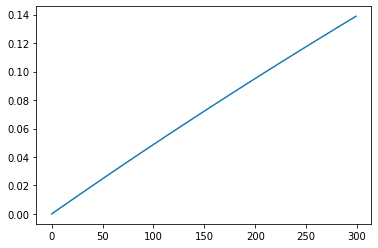

In [169]:
plt.plot(decay)

In [170]:
class ModelEMA:
    """ Model Exponential Moving Average from https://github.com/rwightman/pytorch-image-models
    Keep a moving average of everything in the model state_dict (parameters and buffers).
    This is intended to allow functionality like
    https://www.tensorflow.org/api_docs/python/tf/train/ExponentialMovingAverage
    A smoothed version of the weights is necessary for some training schemes to perform well.
    This class is sensitive where it is initialized in the sequence of model init,
    GPU assignment and distributed training wrappers.
    """

    def __init__(self, model, decay=0.9999, updates=0):
        # Create EMA
        self.ema = deepcopy(model.module if is_parallel(model) else model).eval()  # FP32 EMA
        # if next(model.parameters()).device.type != 'cpu':
        #     self.ema.half()  # FP16 EMA
        self.updates = updates  # number of EMA updates
        self.decay = lambda x: decay * (1 - math.exp(-x / 2000))  # decay exponential ramp (to help early epochs)
        for p in self.ema.parameters():
            p.requires_grad_(False)

    def update(self, model):
        # Update EMA parameters
        with torch.no_grad():
            self.updates += 1
            d = self.decay(self.updates)

            msd = model.module.state_dict() if is_parallel(model) else model.state_dict()  # model state_dict
            for k, v in self.ema.state_dict().items():
                if v.dtype.is_floating_point:
                    v *= d
                    v += (1. - d) * msd[k].detach()

    def update_attr(self, model, include=(), exclude=('process_group', 'reducer')):
        # Update EMA attributes
        copy_attr(self.ema, model, include, exclude)